<a href="https://colab.research.google.com/github/adarsh-meher/AV---LTFS/blob/master/AV_LTFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/adarsh-meher/AV---LTFS.git

Cloning into 'AV---LTFS'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
import os
os.chdir(os.path.join(os.getcwd(),'AV---LTFS'))

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import hyperopt as hopt

In [0]:
train_data = pd.read_csv('train_fwYjLYX.csv')
test_data = pd.read_csv('test_1eLl9Yf.csv')

In [4]:
train_data.info()
#### Nulls present in zone and branch_id variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
id                  180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [6]:
train_data.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [0]:
train_seg1 = train_data[train_data['segment'] == 1]
train_seg1.index = range(train_seg1.shape[0])
train_seg2 = train_data[train_data['segment'] == 2]
train_seg2.index = range(train_seg2.shape[0])

In [8]:
train_seg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66898 entries, 0 to 66897
Data columns (total 6 columns):
application_date    66898 non-null object
segment             66898 non-null int64
branch_id           66898 non-null float64
state               66898 non-null object
zone                66898 non-null object
case_count          66898 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ MB


In [9]:
train_seg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13504 entries, 0 to 13503
Data columns (total 6 columns):
application_date    13504 non-null object
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                0 non-null object
case_count          13504 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 633.1+ KB


# **Analyzing segment-2 data**

In [10]:
train_seg2.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,2,NaN,ASSAM,NaN,0.0
1,2017-04-02,2,NaN,ASSAM,NaN,0.0
2,2017-04-03,2,NaN,ASSAM,NaN,0.0
3,2017-04-04,2,NaN,ASSAM,NaN,0.0
4,2017-04-05,2,NaN,ASSAM,NaN,0.0


In [11]:
train_seg2['month'] = train_seg2['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').month)
train_seg2['day'] = train_seg2['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').day)
train_seg2['week_num'] = train_seg2['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[1])
train_seg2['weekday'] = train_seg2['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[2])
train_seg2['year'] = train_seg2['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [12]:
train_seg2.drop(['branch_id','zone'],inplace = True,axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
train_seg2.head()

,application_date,segment,state,case_count,month,day,week_num,weekday,year
0,2017-04-01,2,ASSAM,0.0,4,1,13,6,2017
1,2017-04-02,2,ASSAM,0.0,4,2,13,7,2017
2,2017-04-03,2,ASSAM,0.0,4,3,14,1,2017
3,2017-04-04,2,ASSAM,0.0,4,4,14,2,2017
4,2017-04-05,2,ASSAM,0.0,4,5,14,3,2017


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


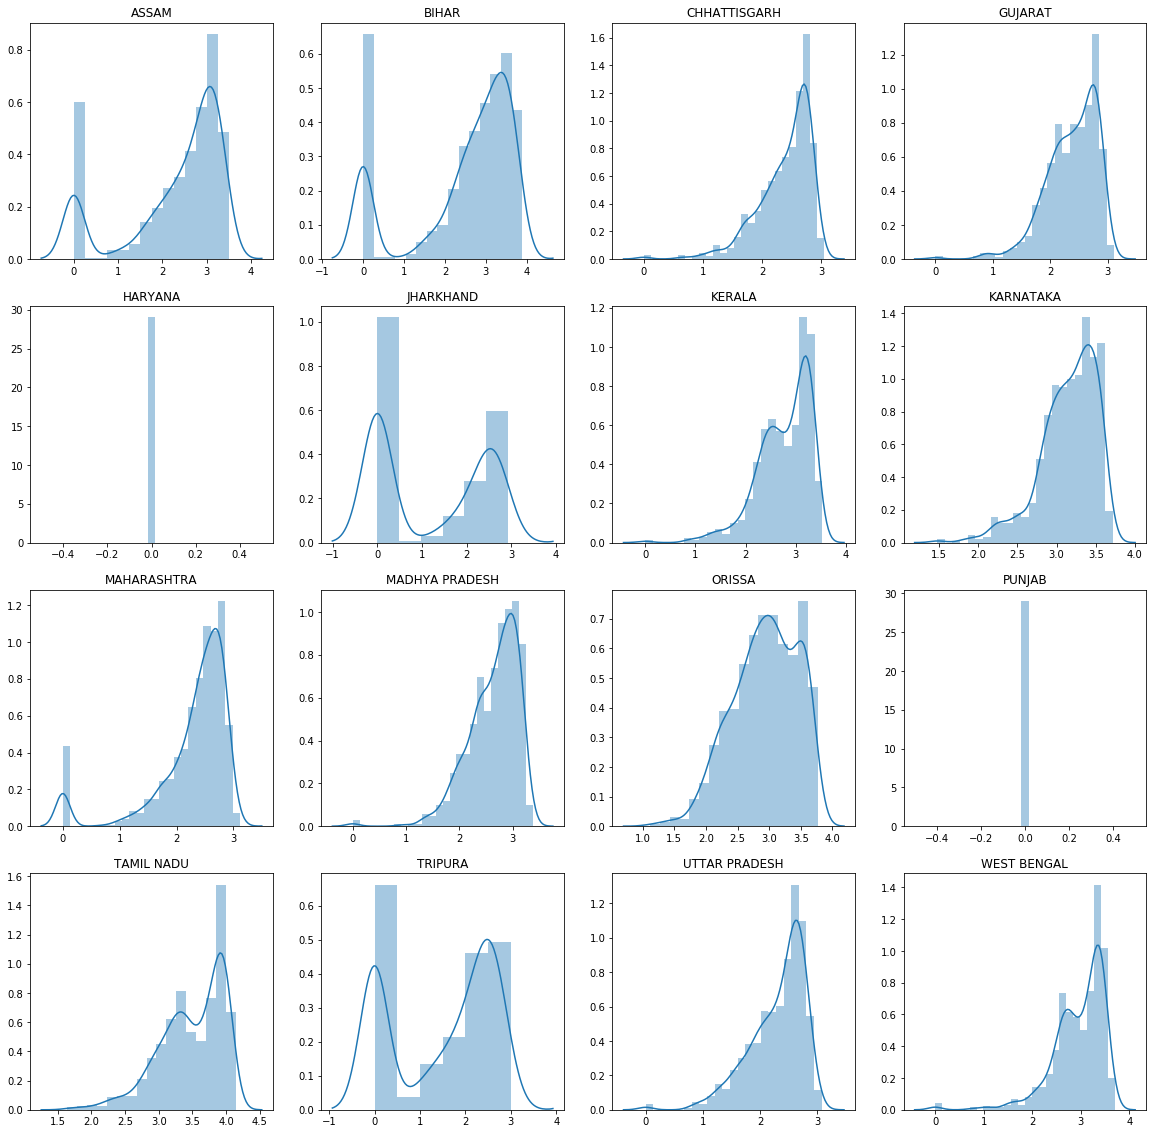

In [14]:
#### Distribution plot of case counts across states.

state_list = train_seg2['state'].unique().tolist()
ncol = 4
nrow = 4
fig,axs = plt.subplots(nrow,ncol,figsize = (20,20))

k = 0
for i in range(nrow):
  for j in range(ncol):
    ax = axs[i,j]

    sb.distplot(np.log10(train_seg2[train_seg2['state'] == state_list[k]]['case_count'].values+1),ax = ax)
    ax.set_title(state_list[k])
    k = k+1

plt.show()


#### Observation from below plot  : Assam, Jharkhand and Bihar are approximately similarly distributed with long tails . Haryana has almost all zero counts.  
#### The remaining have not very skewed distribution of case counts.

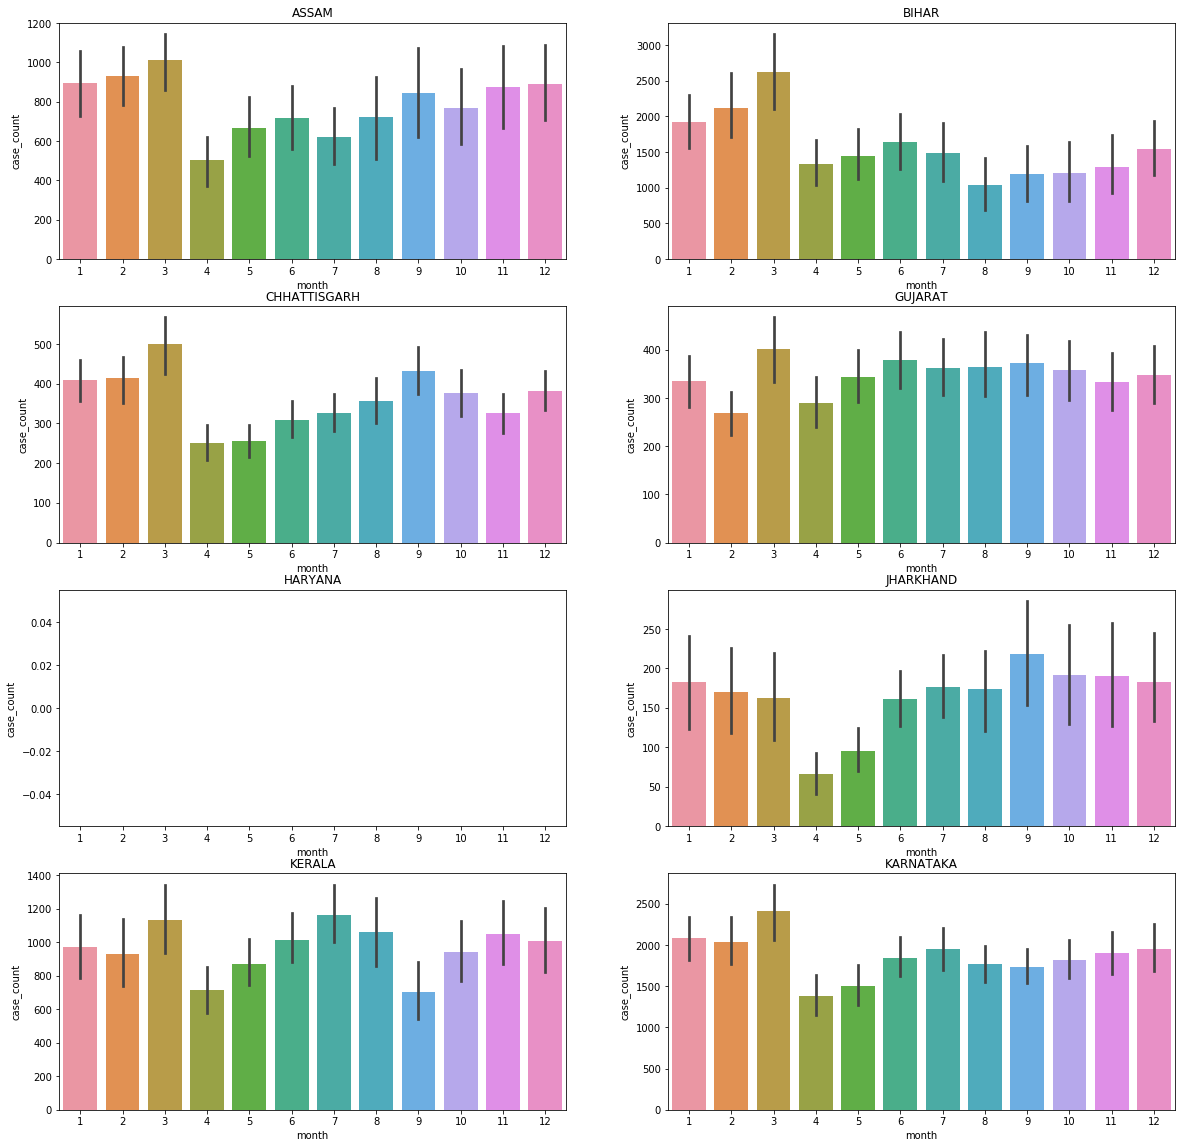

In [15]:
#### count plot of case counts across months for all states.

nrow = 4
ncol = 2

fig,axs = plt.subplots(nrow,ncol,figsize = (20,20))

k = 0
for i in range(nrow):
  for j in range(ncol):
    ax = axs[i,j]

    df1 = train_seg2[train_seg2['state'] == state_list[k]]
    df1.index = range(df1.shape[0])
    sb.barplot(x = df1['month'],y = df1['case_count'],ax = ax)
    ax.set_title(state_list[k])

    k = k+1

plt.show()

#### Observation : Case counts is low in April/May as compared to remaining months. This could be due to start of a financial year.

In [16]:
#### We can remove rows of Haryana state as they contain zero counts. 
train_seg2.drop(train_seg2[train_seg2['state'] == 'HARYANA'].index,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
train_seg2[['year','month']].drop_duplicates().sort_values(by = ['year','month'],ascending = True)

,year,month
0,2017,4
30,2017,5
61,2017,6
91,2017,7
122,2017,8
153,2017,9
183,2017,10
214,2017,11
244,2017,12
275,2018,1


In [18]:
train_seg2.groupby(['year','month']).apply(lambda x : x.shape[0])

year  month
2017  4        450
      5        465
      6        450
      7        465
      8        465
      9        450
      10       465
      11       450
      12       465
2018  1        465
      2        420
      3        465
      4        450
      5        465
      6        450
      7        465
      8        465
      9        450
      10       465
      11       450
      12       450
2019  1        465
      2        420
      3        465
      4        450
      5        465
      6        450
      7        345
      12        15
dtype: int64

# **Analyzing segment-1 data**

In [19]:
train_seg1.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [20]:
print('Number of branches : %s' % train_seg1['branch_id'].nunique())
print('Number of states : %s' % train_seg1['state'].nunique())
print('Number of zones : %s' % train_seg1['zone'].nunique())

Number of branches : 83
Number of states : 20
Number of zones : 5


In [21]:
#### Distribution of case counts across branches
train_seg1.groupby(['branch_id'])['case_count'].agg({'Total_Cases' : sum,'Mean_Cases' : np.mean,'Median_cases' : np.median,'Min_cases' : np.min,'Max_cases' : np.max}).sort_values(by = ['Total_Cases'],ascending = False)

#### We can see some branches have zero counts of cases.We can drop those rows as they do not have any cases to contribute.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,Total_Cases,Mean_Cases,Median_cases,Min_cases,Max_cases
branch_id,,,,,
3.0,135800.0,168.486352,136.0,0.0,1488.0
135.0,130803.0,162.286600,146.0,0.0,1754.0
1.0,128683.0,159.656328,146.0,0.0,1657.0
5.0,125372.0,155.548387,153.0,0.0,1143.0
34.0,110280.0,136.823821,123.0,0.0,1803.0
...,...,...,...,...,...
262.0,5.0,0.006203,0.0,0.0,2.0
265.0,4.0,0.004963,0.0,0.0,3.0
267.0,1.0,0.001241,0.0,0.0,1.0


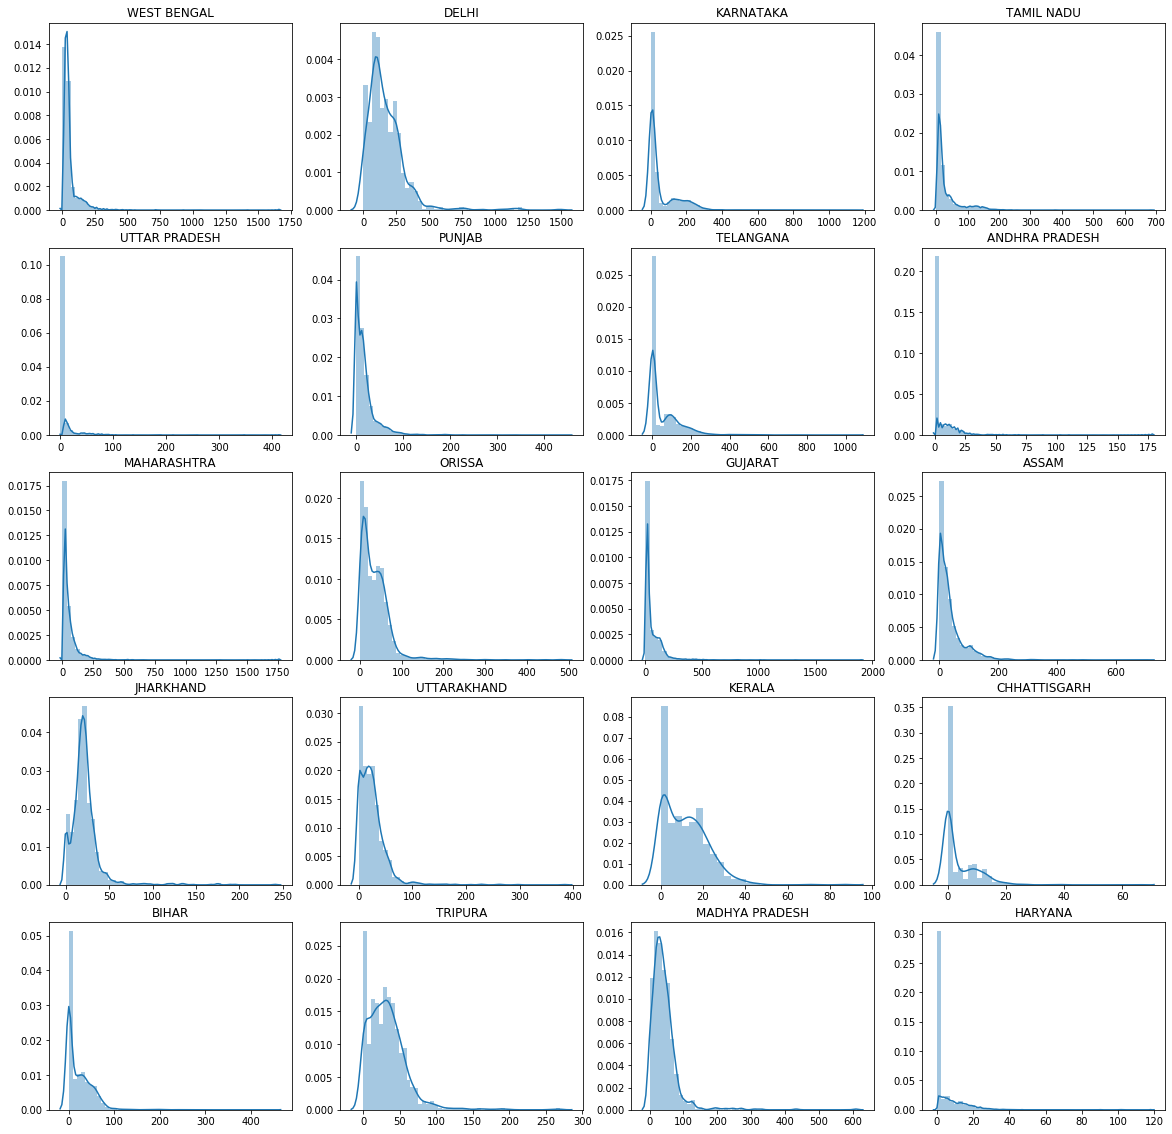

In [22]:
#### Distribution plot of case counts across states.

state_list = train_seg1['state'].unique().tolist()
ncol = 4
nrow = 5
fig,axs = plt.subplots(nrow,ncol,figsize = (20,20))

k = 0
for i in range(nrow):
  for j in range(ncol):
    ax = axs[i,j]

    sb.distplot(train_seg1[train_seg1['state'] == state_list[k]]['case_count'].values,ax = ax)
    ax.set_title(state_list[k])
    k = k+1

plt.show()


#### Observation from below plot  : data is highly skewed. jahrkhand, MP and Delhi having least skewness. 

In [23]:
train_seg1['month'] = train_seg1['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').month)
train_seg1['day'] = train_seg1['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').day)
train_seg1['week_num'] = train_seg1['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[1])
train_seg1['weekday'] = train_seg1['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[2])
train_seg1['year'] = train_seg1['application_date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').isocalendar()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [24]:
train_seg1.head()

,application_date,segment,branch_id,state,zone,case_count,month,day,week_num,weekday,year
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,4,1,13,6,2017
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,4,3,14,1,2017
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4,4,14,2,2017
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,4,5,14,3,2017
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4,7,14,5,2017


In [25]:
train_seg1[['year','month']].drop_duplicates().sort_values(by = ['year','month'],ascending = True)

,year,month
0,2017,4
24,2017,5
54,2017,6
84,2017,7
111,2017,8
141,2017,9
167,2017,10
198,2017,11
228,2017,12
259,2018,1


In [26]:
train_seg1.groupby(['year','month']).apply(lambda x : x.shape[0])

year  month
2017  4        1992
      5        2490
      6        2490
      7        2241
      8        2490
      9        2158
      10       2573
      11       2490
      12       2573
2018  1        2490
      2        2241
      3        2407
      4        2490
      5        2573
      6        2490
      7        2573
      8        2573
      9        2490
      10       2573
      11       2490
      12       2490
2019  1        2573
      2        2324
      3        2573
      4        2490
      5        2573
      6        2490
      7         415
      12         83
dtype: int64

# **Creating train/test split.**

In [27]:
#### Splitting data on last 3 months
test_vals = [201905,201906,201907,201912]

train_seg1['year_month'] = train_seg1[['year','month']].apply(lambda x : x[0]*100+x[1],axis = 1)
train_seg2['year_month'] = train_seg2[['year','month']].apply(lambda x : x[0]*100+x[1],axis = 1)

train1 = train_seg1[~train_seg1['year_month'].isin(test_vals)]
test1 = train_seg1[train_seg1['year_month'].isin(test_vals)]
train2 = train_seg2[~train_seg2['year_month'].isin(test_vals)]
test2 = train_seg2[train_seg2['year_month'].isin(test_vals)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# **Selecting variables in train/test data.**

In [0]:
cols_to_drop = ['application_date', 'segment', 'year_month']
cols_to_dummy = ['branch_id','state','zone','year']
seg1_cols = [ x for x in train_seg1.columns if x not in cols_to_drop ]
train1_dummy = pd.get_dummies(train1.drop(cols_to_drop,axis = 1),columns = cols_to_dummy,drop_first= True)
test1_dummy = pd.get_dummies(test1.drop(cols_to_drop,axis = 1),columns = cols_to_dummy,drop_first= True)

In [0]:
cols_to_drop = ['application_date', 'segment', 'year_month']
cols_to_dummy = ['state','year']
seg2_cols = [ x for x in train_seg2.columns if x not in cols_to_drop ]
train2_dummy = pd.get_dummies(train2.drop(cols_to_drop,axis = 1),columns = cols_to_dummy,drop_first= True)
test2_dummy = pd.get_dummies(test2.drop(cols_to_drop,axis = 1),columns = cols_to_dummy,drop_first= True)

# **Fitting model and time series cross validation**

In [0]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge,HuberRegressor,BayesianRidge,ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score 
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [0]:
#### MAPE scorer
def MAPE(y_true,y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def overall_MAPE(mape1,mape2):
  return 0.5*mape1+0.5*mape2

mape_score = make_scorer(MAPE,greater_is_better=False)

In [88]:
cv = 3
split_on = 'year_month'
num_splits_val = 2
total_split_vals = cv*num_splits_val
split_vals = train1[split_on].unique().tolist()[-total_split_vals:]
split_vals_cv = [ split_vals[(2*i):(2*i+2)] if i!=0 else split_vals[0:2] for i in range(cv) ]
model = Lasso(random_state = 1000)
mape_cv = []
for c in split_vals_cv:
  first_val = c[0]
  print(first_val)
  tr_ind = train1[train1['year_month'] < first_val].index
  test_ind = train1[train1['year_month'].isin(c)].index
  app_dates = train1[train1['year_month'].isin(c)]['application_date']
  
  x_train = train1_dummy.loc[tr_ind,:].drop(['case_count'],axis = 1)
  x_test = train1_dummy.loc[test_ind,:].drop(['case_count'],axis = 1)
  y_train = train1_dummy.loc[tr_ind,:]['case_count']
  y_test = train1_dummy.loc[test_ind,:]['case_count']

  model_fit = model.fit(x_train.values,y_train.values)
  model_preds = model_fit.predict(x_test)
  model_preds_df = pd.concat([app_dates,y_test,pd.Series(model_preds)],axis = 1).rename(columns = {'application_date' : 'app_date','case_count' : 'Actual',0:'Predicted'})
  model_preds_rolled = model_preds_df.groupby(['app_date']).agg(np.sum).reset_index()
  mape_cv.append(MAPE(model_preds_rolled['Actual'],model_preds_rolled['Predicted']))
  print(mape_cv)




201811
[88.09005301314706]
201901
[88.09005301314706, 94.45592108238606]
201903
[88.09005301314706, 94.45592108238606, 93.62298226790587]
